In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn import linear_model
import sklearn.datasets as toy_datasets
import yfinance as yf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
data = yf.download(['AAPL', 'XOM'],'2021-01-01','2021-12-31')

data = data.dropna()
ticker1 = data['Close']['AAPL'].diff()
ticker2 = data['Close']['XOM'].diff()

xx = ticker1
yy = ticker2

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


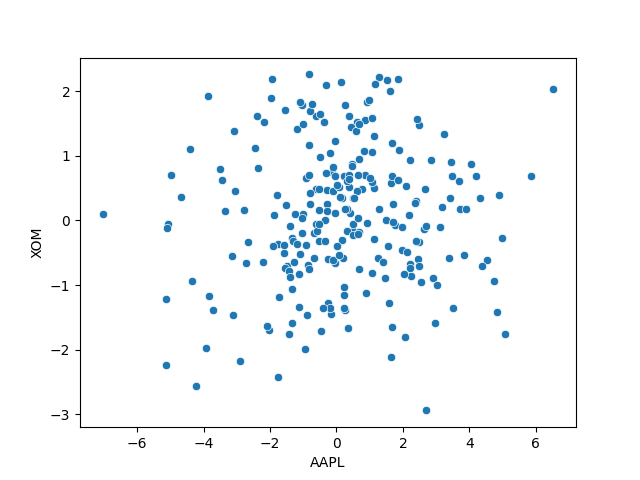

<AxesSubplot:xlabel='AAPL', ylabel='XOM'>

In [25]:
plt.figure()
sns.scatterplot(x=xx, y=yy)

<IPython.core.display.Javascript object>


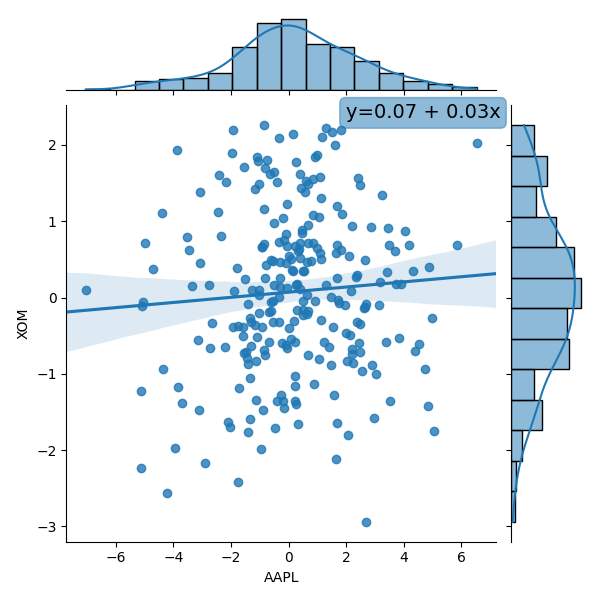

Text(0.65, 0.97, 'y=0.07 + 0.03x')

In [56]:
g = sns.jointplot(x=xx, y=yy, kind='reg', truncate=False)
# plot the regression equation
regr = linear_model.LinearRegression()
regr.fit(xx.values[1:].reshape(-1,1), yy.values[1:].reshape(-1,1))
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y=%0.02f + %0.02fx' % (regr.intercept_, regr.coef_[0])
g.ax_joint.text(0.65, 0.97, textstr, transform=g.ax_joint.transAxes, fontsize=14, bbox=props)

<IPython.core.display.Javascript object>


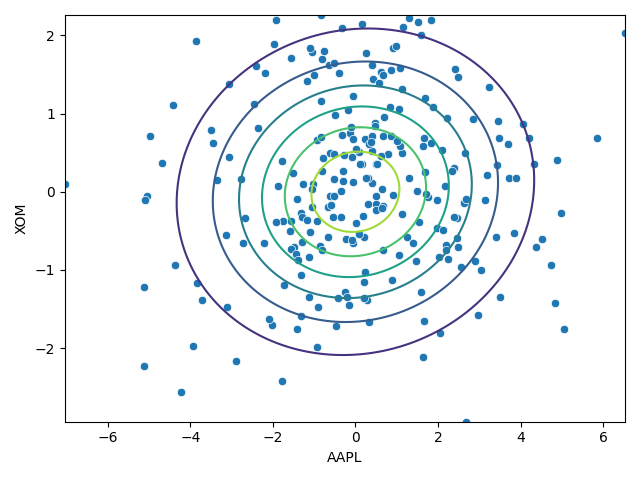

In [35]:
plt.figure()

sns.scatterplot(x=xx, y=yy)

R = np.cov(np.vstack((xx.values[1:], yy.values[1:])))
rv = mvn([np.mean(xx), np.mean(yy)], R)

N = 200
X = np.linspace(np.min(xx), np.max(xx), N)
Y = np.linspace(np.min(yy), np.max(yy), N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
Z = rv.pdf(pos)

plt.contour(X, Y, Z)
plt.show()
plt.tight_layout()
# sns.kdeplot(, bw=0.25)

<IPython.core.display.Javascript object>


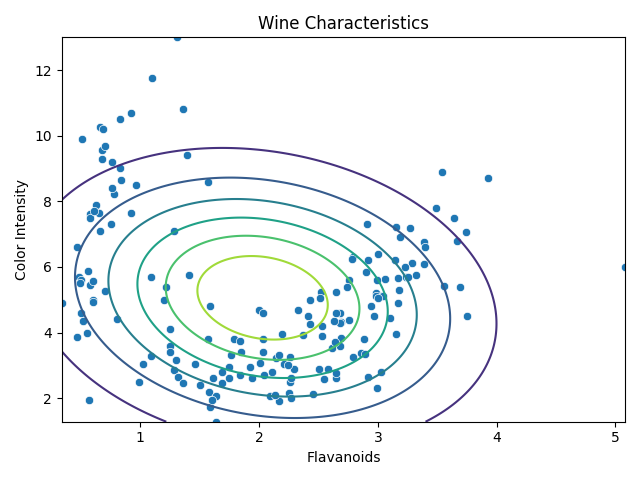

In [68]:
X, y = toy_datasets.load_wine(return_X_y=True)
xx = X[:,6]  # flavanoids measurement
yy = X[:,9]  # color intensity measurement
plt.figure()
sns.scatterplot(x=xx, y=yy)

R = np.cov(np.vstack((xx, yy)))
rv = mvn([np.mean(xx), np.mean(yy)], R)

N = 200
X = np.linspace(np.min(xx), np.max(xx), N)
Y = np.linspace(np.min(yy), np.max(yy), N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))
Z = rv.pdf(pos)

plt.contour(X, Y, Z)
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.title('Wine Characteristics')
plt.show()
plt.tight_layout()
